In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
import speechbrain as sb
from speechbrain.processing.features import STFT, spectral_magnitude, Filterbank
import torchaudio
import torch
from loggers.wave_loggers import plot_waveform, plot_spectrogram, plot_filterbank
from loggers.statistics_loggers import print_stats

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [4]:
blue_exp_path = 'original_data/genres_original/blues/blues.00000.wav'
waveform, sample_rate = torchaudio.load(blue_exp_path)
print('waveform.shape: ', waveform.shape)
print('sample_rate: ', sample_rate)

waveform.shape:  torch.Size([1, 661794])
sample_rate:  22050


In [5]:
print_stats(waveform)

Shape: (1, 661794)
Dtype: torch.float32
 - Max:      0.885
 - Min:     -0.840
 - Mean:    -0.000
 - Std Dev:  0.141

tensor([[ 0.0073,  0.0166,  0.0076,  ..., -0.0556, -0.0611, -0.0642]])



In [6]:
# split the wave to get shorter fragments

wave_fragment_1 = waveform[0: 1, 0:10*sample_rate]
wave_fragment_2 = waveform[0: 1, 10*sample_rate : 20* sample_rate]
wave_fragment_3 = waveform[0: 1, 20*sample_rate : 30* sample_rate]

In [7]:
print_stats(wave_fragment_1)

Shape: (1, 220500)
Dtype: torch.float32
 - Max:      0.723
 - Min:     -0.815
 - Mean:    -0.000
 - Std Dev:  0.137

tensor([[0.0073, 0.0166, 0.0076,  ..., 0.0762, 0.0768, 0.0813]])



In [8]:
print_stats(wave_fragment_2)

Shape: (1, 220500)
Dtype: torch.float32
 - Max:      0.885
 - Min:     -0.840
 - Mean:    -0.000
 - Std Dev:  0.146

tensor([[ 0.0843,  0.0764,  0.0644,  ..., -0.0666, -0.1357, -0.0778]])



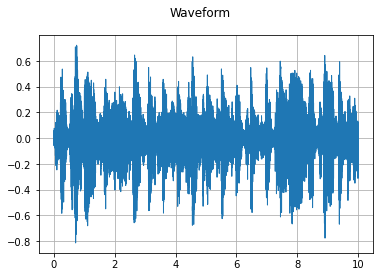

In [9]:
plot_waveform(wave_fragment_1, sample_rate)

In [10]:
compute_STFT = STFT(
     sample_rate=22050, win_length=15, hop_length=20, n_fft=400
 )
features = compute_STFT(wave_fragment_1)

In [11]:
print_stats(features)

Shape: (1, 501, 201, 2)
Dtype: torch.float32
 - Max:     33.057
 - Min:     -32.919
 - Mean:    -0.000
 - Std Dev:  1.115

tensor([[[[-1.8304e+00,  0.0000e+00],
          [ 9.0893e-01, -1.2626e+00],
          [ 2.2452e-01,  9.2256e-01],
          ...,
          [-5.7539e-04, -1.4305e-06],
          [ 5.3835e-04, -8.0556e-05],
          [-4.2814e-04,  0.0000e+00]],

         [[-7.3778e-01,  0.0000e+00],
          [ 8.8527e-01, -1.8178e+00],
          [-4.8457e-01,  1.1668e+00],
          ...,
          [-5.6624e-04, -5.9080e-04],
          [-1.0509e-03, -3.1620e-04],
          [-1.2504e-03,  0.0000e+00]],

         [[ 5.9041e-01,  0.0000e+00],
          [-4.9690e-01, -6.3864e-01],
          [ 2.1120e-01, -9.5664e-01],
          ...,
          [ 1.9723e-04,  7.3433e-05],
          [ 5.8851e-04,  6.3002e-05],
          [ 6.7535e-04,  0.0000e+00]],

         ...,

         [[-2.0725e-01,  0.0000e+00],
          [ 2.3237e+00,  3.9967e-01],
          [-5.6107e+00,  1.0699e-01],
          ...

In [12]:
sptr = spectral_magnitude(features)

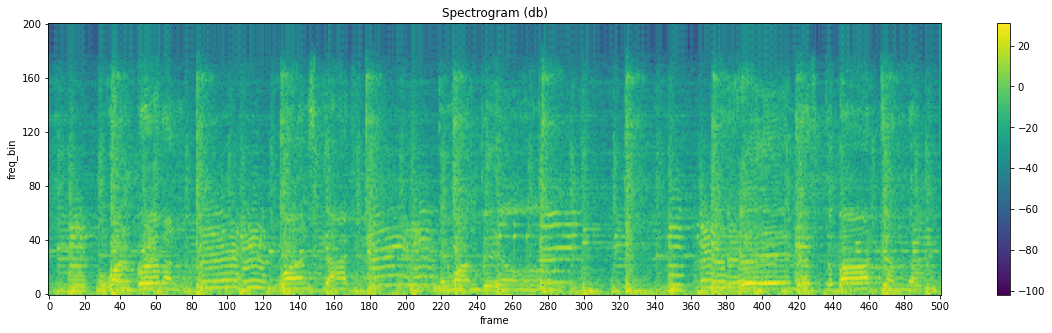

In [13]:
plot_spectrogram(sptr[0].T)

In [14]:
print_stats(sptr)

Shape: (1, 501, 201)
Dtype: torch.float32
 - Max:     1278.145
 - Min:      0.000
 - Mean:     2.485
 - Std Dev: 21.762

tensor([[[3.3503e+00, 2.4202e+00, 9.0152e-01,  ..., 3.3108e-07,
          2.9631e-07, 1.8330e-07],
         [5.4432e-01, 4.0879e+00, 1.5963e+00,  ..., 6.6968e-07,
          1.2045e-06, 1.5635e-06],
         [3.4858e-01, 6.5478e-01, 9.5976e-01,  ..., 4.4293e-08,
          3.5031e-07, 4.5610e-07],
         ...,
         [4.2951e-02, 5.5595e+00, 3.1492e+01,  ..., 1.1072e-05,
          1.7331e-05, 2.0184e-05],
         [2.2649e+00, 7.4786e+00, 9.8928e+00,  ..., 7.7685e-06,
          2.1742e-05, 3.2257e-05],
         [4.8241e+00, 1.3496e+01, 1.6453e+01,  ..., 1.7911e-03,
          1.7475e-03, 1.8044e-03]]])



In [15]:
compute_fbanks = Filterbank(n_mels=40, sample_rate=22050)
fbanks = compute_fbanks(sptr)

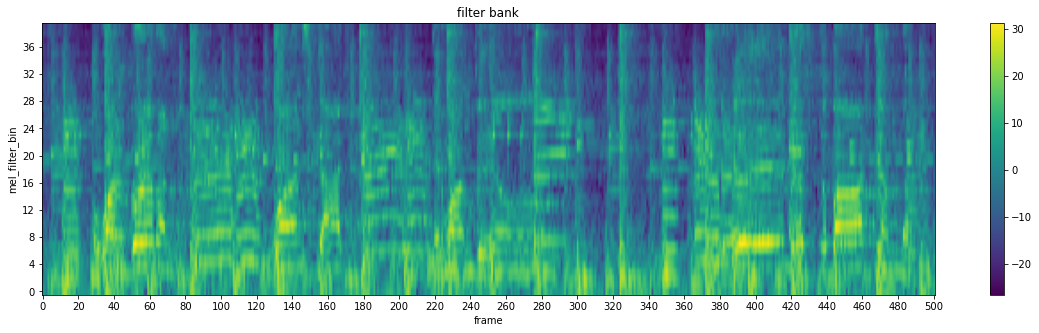

In [16]:
plot_filterbank(fbanks[0].T)

In [17]:
print_stats(fbanks)

Shape: (1, 501, 40)
Dtype: torch.float32
 - Max:     31.334
 - Min:     -26.540
 - Mean:     0.094
 - Std Dev: 10.087

tensor([[[  2.6337,   0.3976,  -3.8385,  ..., -15.3846, -13.5259, -16.7664],
         [  4.9101,   2.7771,  -0.5165,  ..., -20.8235, -12.6531, -15.2863],
         [ -3.0440,  -1.3738,   1.8860,  ..., -19.9585, -15.2409, -18.9281],
         ...,
         [  6.2455,  13.0719,  13.4870,  ..., -23.9894, -20.2739, -18.8439],
         [  7.5333,   8.8528,   6.9408,  ..., -18.6715, -16.6453, -15.4533],
         [ 10.0971,  11.1432,   9.0491,  ..., -15.5554, -16.1445, -15.9750]]])

